In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import sqlite3

db = sqlite3.connect('pi_database.db')
con = db.cursor()

In [3]:
query = "SELECT * FROM total_27junho2020;"
queryResult = pd.read_sql_query(query,db)
total = pd.DataFrame(queryResult)

In [8]:
total_mun = pd.read_csv('dataset/total_municipios.csv')
total_estado = pd.read_csv('dataset/total_estados.csv')

# Gráficos

<AxesSubplot:>

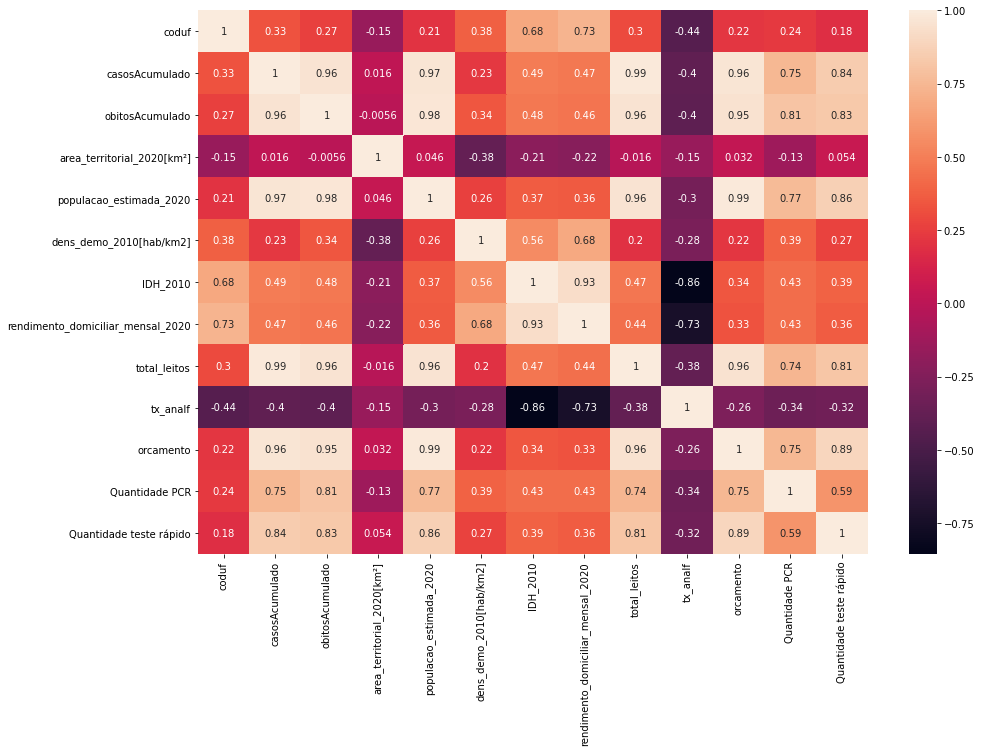

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(total_estado.corr(), annot=True)

In [10]:
col = ['area_territorial_2020[km²]', 'populacao_estimada_2020','dens_demo_2010[hab/km2]',
       'IDH_2010','rendimento_domiciliar_mensal_2020','total_leitos',
       'tx_analf', 'orcamento']

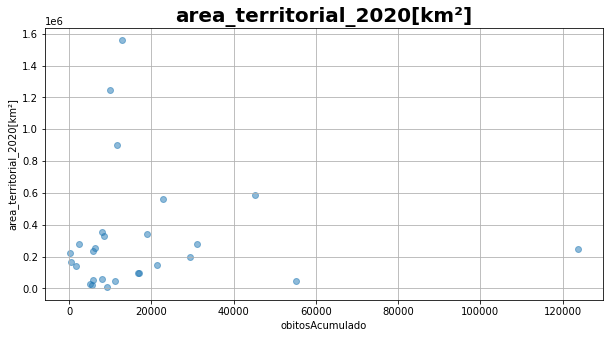

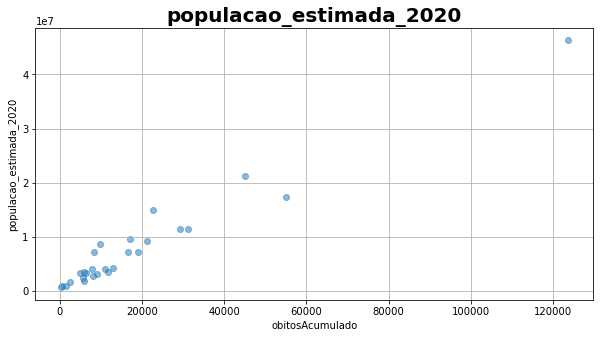

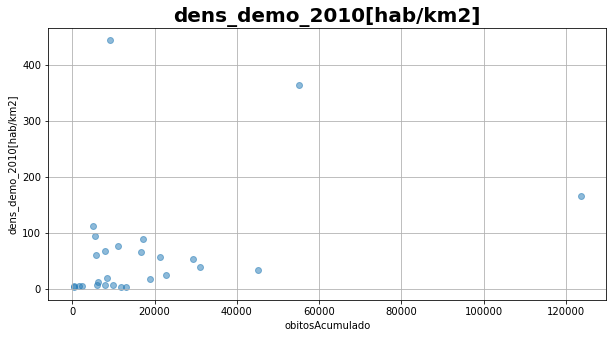

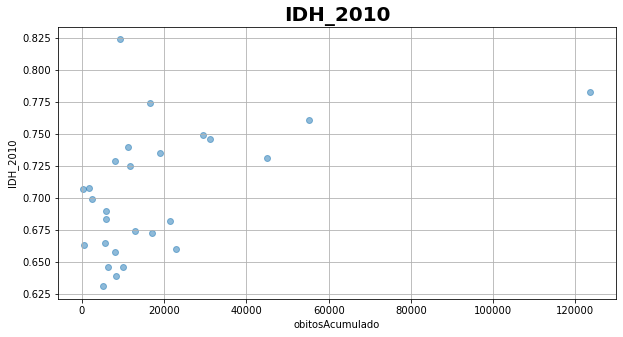

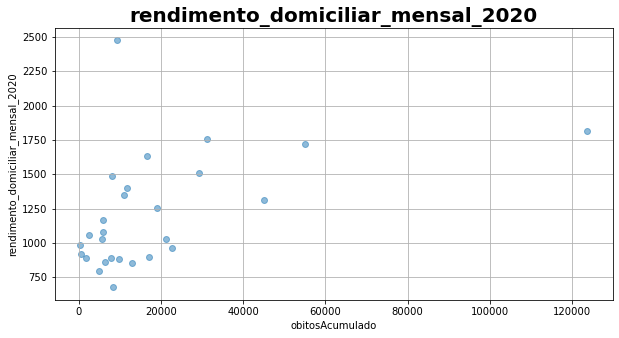

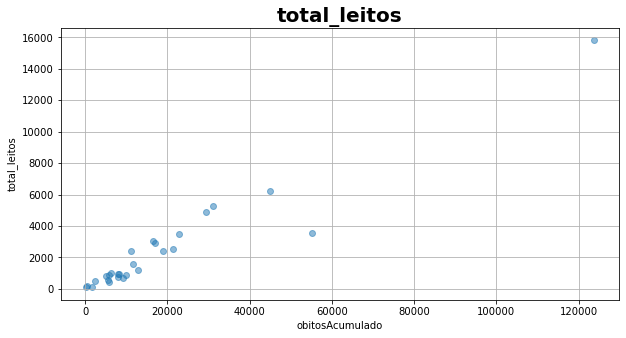

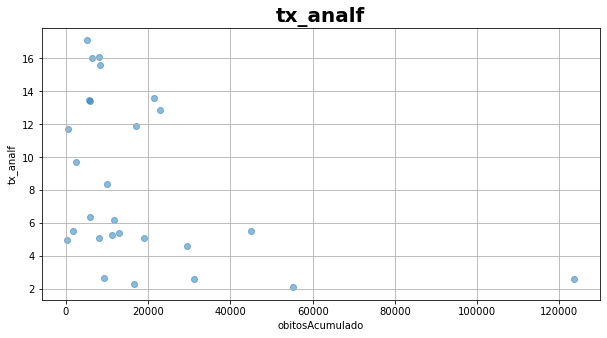

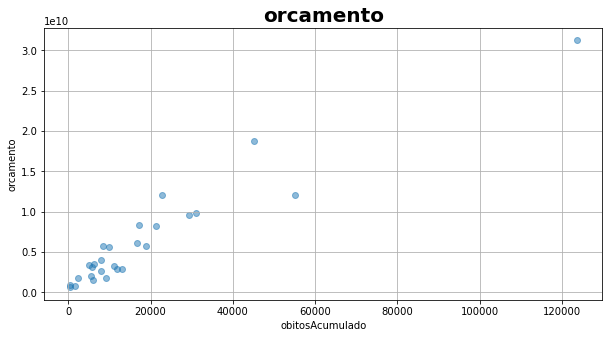

In [11]:
#Gráfico de dispersão
for coluna in col:
    plt.figure(figsize=(10,5))
    plt.scatter (x = total_estado['obitosAcumulado'], y = total_estado[coluna], alpha =0.5)
    plt.title(coluna, fontsize = 20, fontweight='bold')
    plt.xlabel('obitosAcumulado')
    plt.ylabel(coluna)
    plt.grid()

    plt.show()

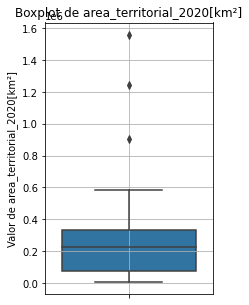

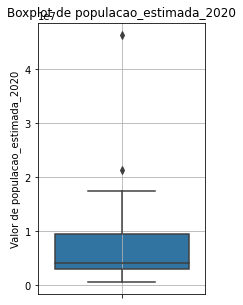

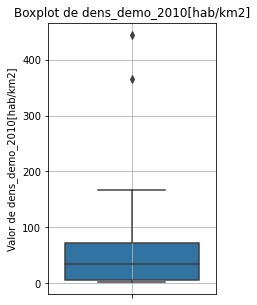

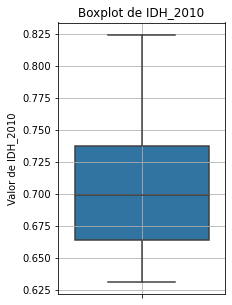

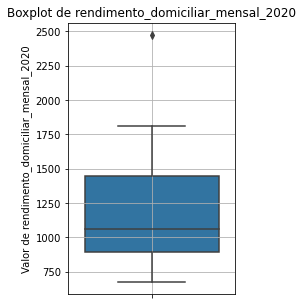

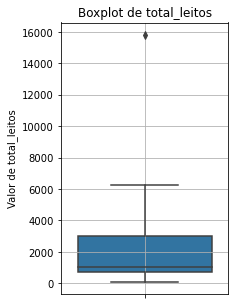

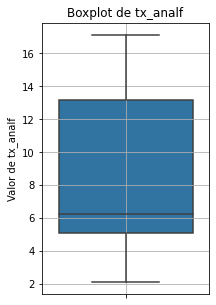

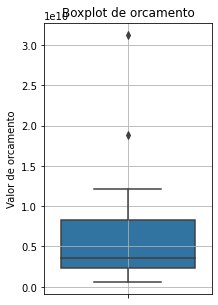

In [12]:
for i in col:
    plt.figure(figsize=(3,5))
    sns.boxplot(y=total_estado[i], orient='v')
    plt.title(f'Boxplot de {i}')
    plt.ylabel(f'Valor de {i}')
    plt.grid()
    
    plt.show()

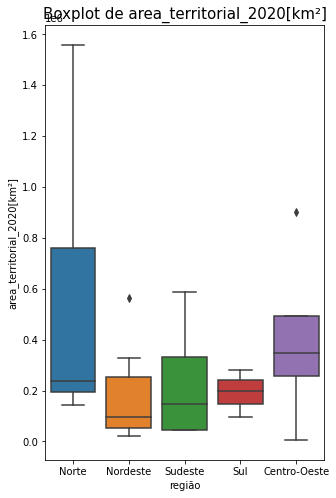

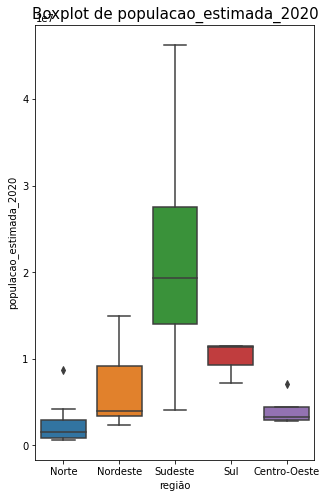

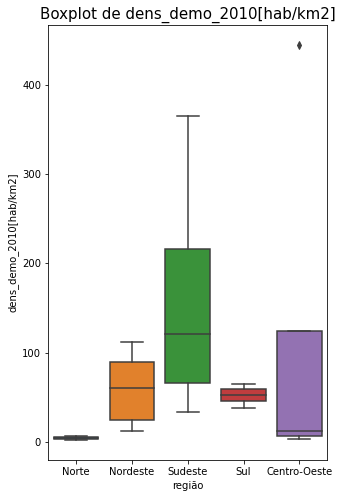

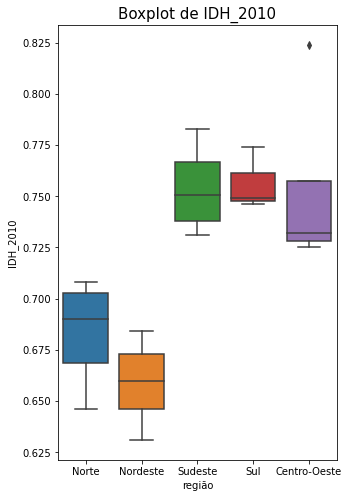

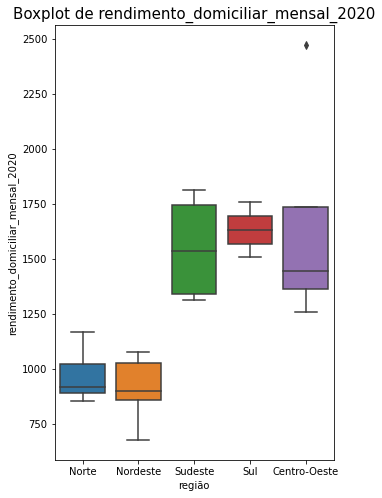

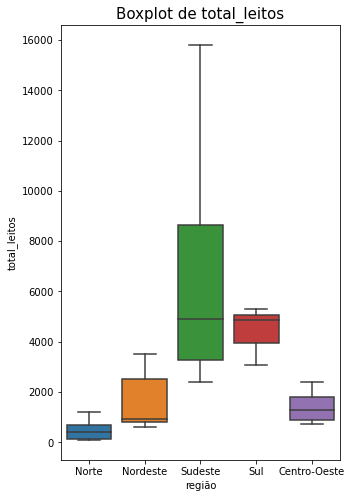

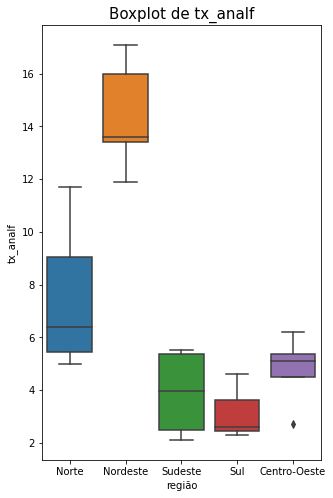

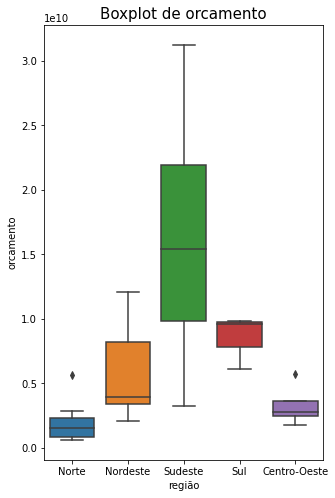

In [13]:
for col in col:
    plt.figure(figsize=(5,8))
    sns.boxplot(x= total_estado['regiao'], y= total_estado[col], orient='v')
    plt.title(f'Boxplot de {col}', fontsize = 15)
    plt.ylabel(col)
    plt.xlabel('região')
    
    plt.show()        

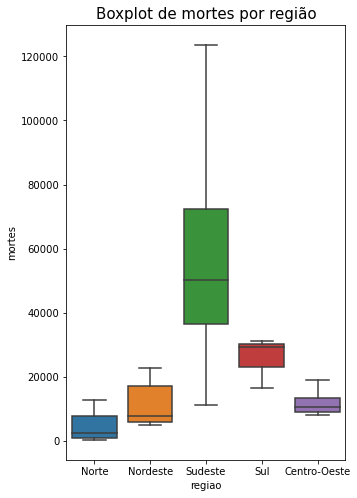

In [14]:
plt.figure(figsize=(5,8))
sns.boxplot(x= total_estado['regiao'], y= total_estado['obitosAcumulado'], orient='v')
plt.title(f'Boxplot de mortes por região', fontsize = 15)
plt.ylabel('mortes')
plt.xlabel('regiao')
    
plt.show()

# Teste de cluster

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
colunas = ['coduf','casosAcumulado','obitosAcumulado','area_territorial_2020[km²]','populacao_estimada_2020',
           'dens_demo_2010[hab/km2]','IDH_2010','rendimento_domiciliar_mensal_2020','total_leitos',
           'tx_analf', 'orcamento', 'Quantidade PCR', 'Quantidade teste rápido']

In [18]:
norm = pd.DataFrame(data=total_estado[colunas])

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit_transform(norm)

In [20]:
norm = pd.DataFrame(scaler, columns = norm.columns)

In [21]:
from sklearn.cluster import KMeans

In [22]:
seg = norm[colunas].values

In [23]:
km = KMeans(n_clusters=6)
km.fit(seg)

KMeans(n_clusters=6)

In [24]:
y_means = km.predict(seg)

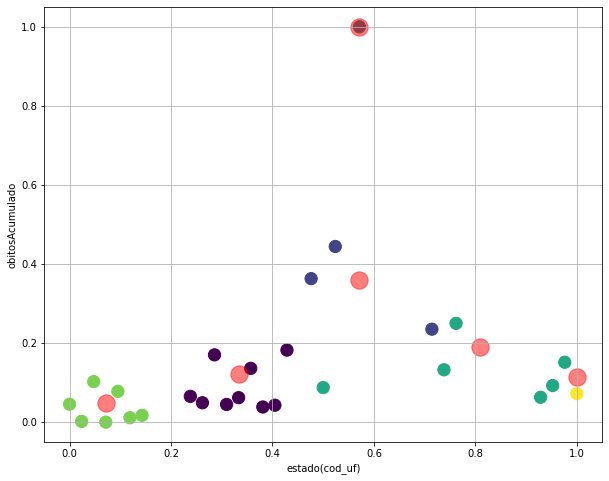

In [25]:
plt.figure(figsize = (10,8))

plt.scatter(seg[:, 0], seg[:, 2], c=y_means, s = 150)
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5)
plt.xlabel('estado(cod_uf)')
plt.ylabel('obitosAcumulado')
plt.grid()
plt.show()

C:\Users\rsoares\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

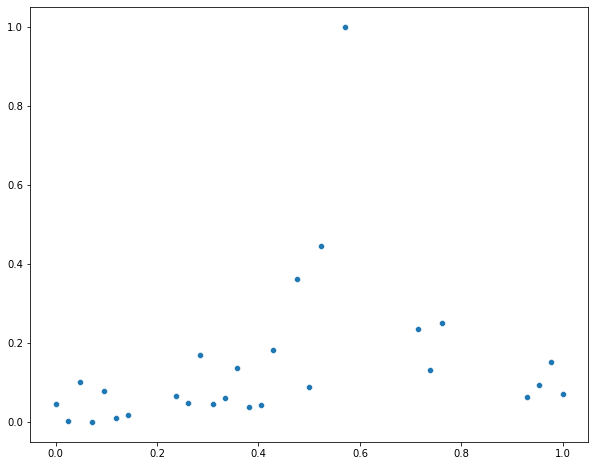

In [26]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(seg[:,0], seg[:,2]) #hue: colere conforme criterio passado (labes já estabelecidas previamente)

In [27]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
norm=std.fit_transform(norm) 

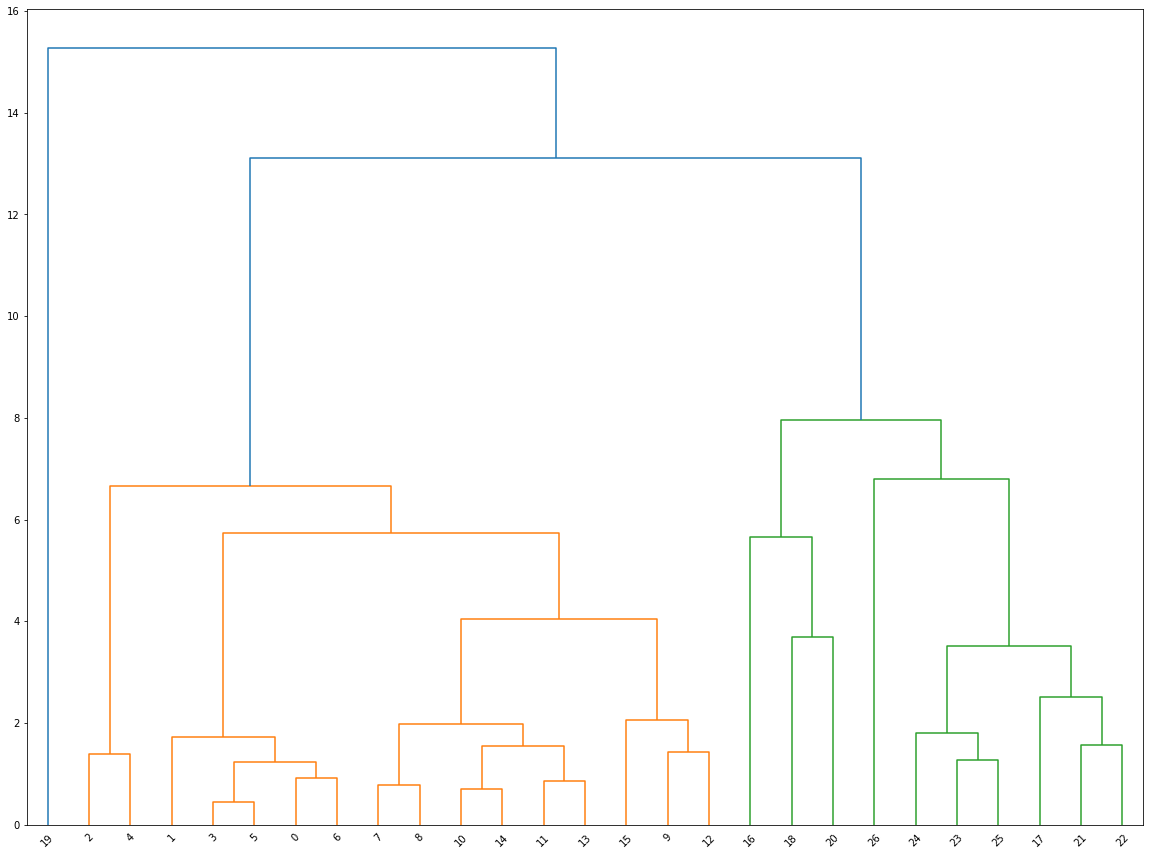

In [28]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(norm, method  = "ward"))

- Testar o método cotovelo
- Tratar outliers
- Feature importance
- Padronização ou normalização
- Avaliar métricas